# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
preview_data = combined_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Age_months", "Weight (g)"]]
print(preview_data.head())


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     k403          0           45.000000                 0     Ramicane   
1     k403          5           38.825898                 0     Ramicane   
2     k403         10           35.014271                 1     Ramicane   
3     k403         15           34.223992                 1     Ramicane   
4     k403         20           32.997729                 1     Ramicane   

   Age_months  Weight (g)  
0          21          16  
1          21          16  
2          21          16  
3          21          16  
4          21          16  


In [2]:
# Checking the number of mice.


249

In [5]:
# Checking the number of mice
num_mice = combined_data["Mouse ID"].nunique()
num_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [6]:
# Find duplicate mice based on both "Mouse ID" and "Timepoint"
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Extract the Mouse ID values of the duplicate mice
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

duplicate_mouse_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Get all the data for the duplicate mouse ID
all_duplicate_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

# Display the data for the duplicate mouse ID
all_duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Display the clean DataFrame
print(cleaned_data)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# Checking the number of mice in the clean DataFrame.


248

In [12]:
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
num_mice_cleaned

249

In [11]:
num_mice1 = cleaned_data["Mouse ID"].nunique()
num_mice1

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Group the data by "Drug Regimen"
grouped_data = cleaned_data.groupby("Drug Regimen")

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = grouped_data["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std', 'sem': 'Tumor Volume SEM'})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [18]:
# Group the data by "Drug Regimen" and calculate summary statistics in a single line
summary_stats_advanced = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Deviation='std',
    SEM='sem'
).reset_index()

summary_stats_advanced

,Drug Regimen,Mean,Median,Variance,Std_Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

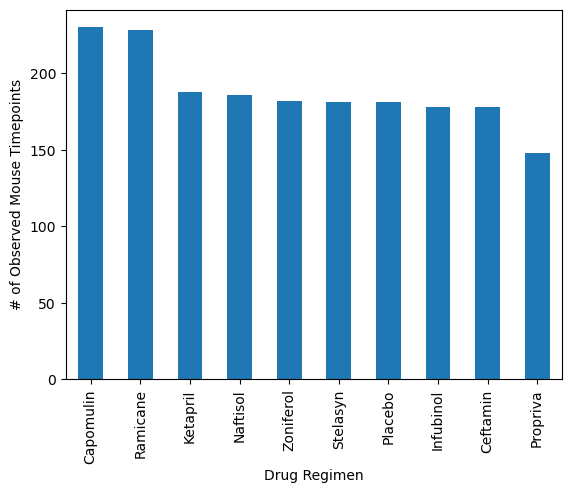

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


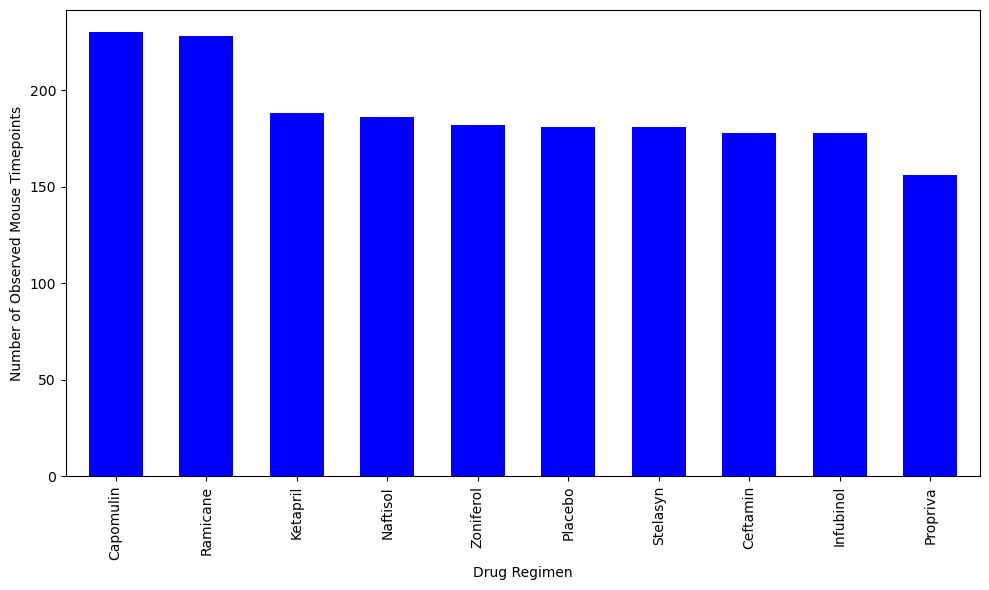

In [33]:
# Group the data by "Drug Regimen" and count the number of rows
regimen_counts = cleaned_data.groupby("Drug Regimen").size()

# Sort the regimen_counts in descending order
regimen_counts = regimen_counts.sort_values(ascending=False)

# Create a bar plot using Pandas with adjusted width
regimen_counts.plot(kind="bar", color="blue", figsize=(10, 6), width=0.6)

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

# Show the plot
plt.tight_layout()
plt.show()

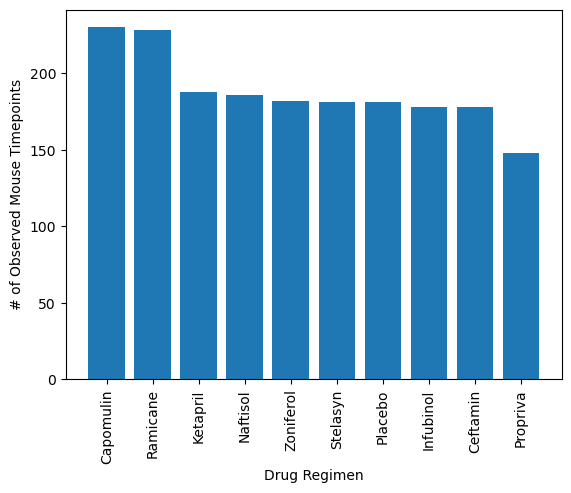

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


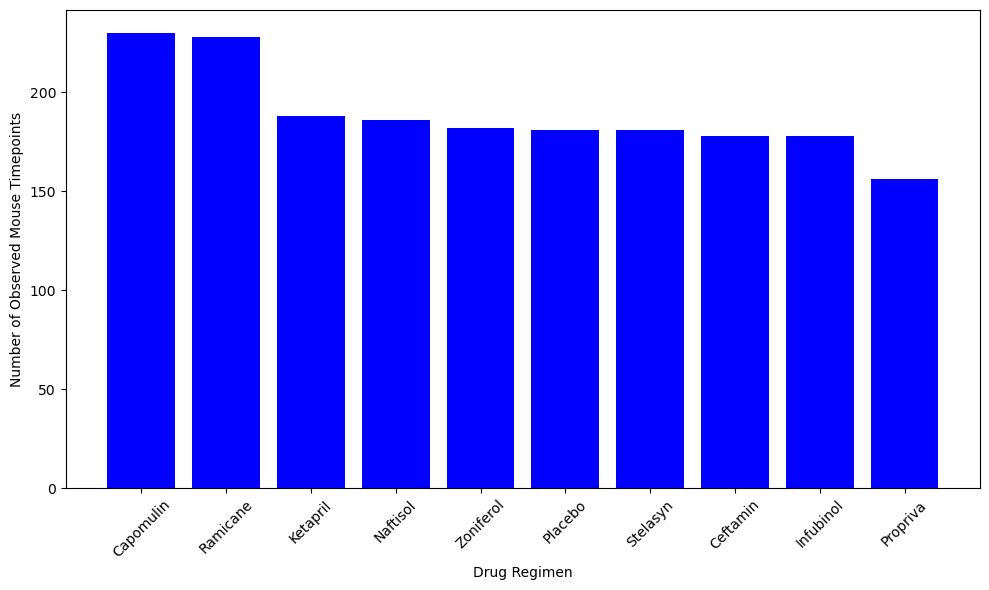

In [31]:
# Group the data by "Drug Regimen" and count the number of rows
regimen_counts = cleaned_data.groupby("Drug Regimen").size()

# Sort the regimen_counts in descending order
regimen_counts = regimen_counts.sort_values(ascending=False)

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color="blue")

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

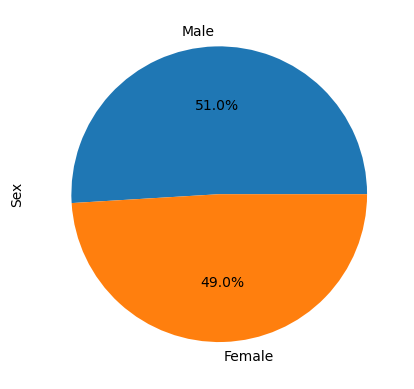

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


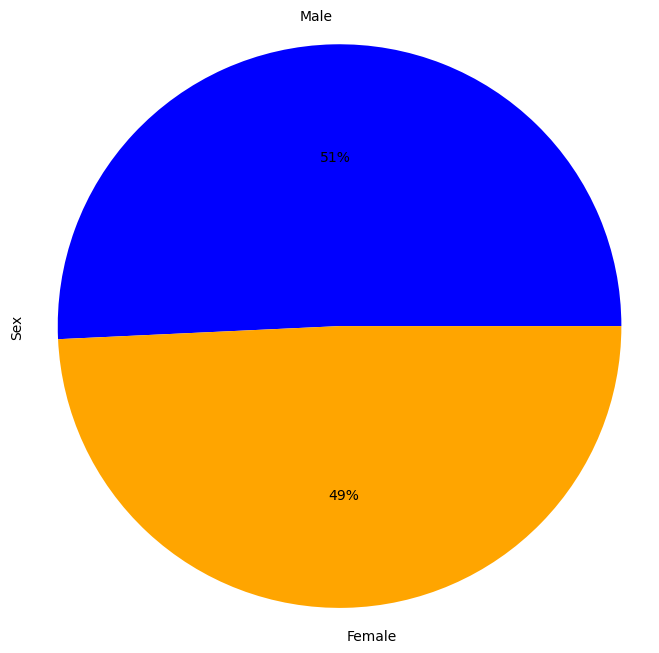

In [40]:
# Group the data by "Sex" and count the number of mice in each category
gender_distribution = cleaned_data["Sex"].value_counts()

# Create a pie plot using Pandas with rounded percentages
gender_distribution.plot(kind="pie", autopct=lambda p: '{:.0f}%'.format(p), colors=["blue", "orange"], figsize=(8, 8))

# Set a custom label for the y-axis (vertical axis)
plt.ylabel("Sex")

# Show the plot
plt.axis("equal")
plt.show()

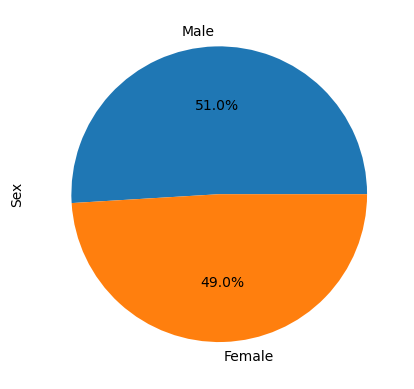

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


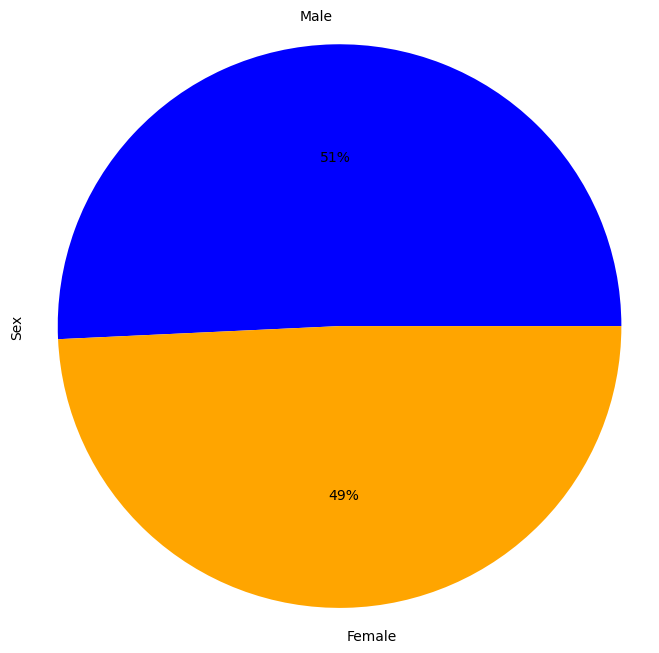

In [42]:
# Group the data by "Sex" and count the number of mice in each category
gender_distribution = cleaned_data["Sex"].value_counts()

# Create a pie plot using Matplotlib's pyplot with rounded percentages
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct=lambda p: '{:.0f}%'.format(p), colors=["blue", "orange"])

# Set a custom label for the y-axis (vertical axis)
plt.ylabel("Sex")

# Set the aspect ratio to be equal for a circular pie plot
plt.axis("equal")

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [43]:
# List of treatment regimens
target_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Get the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

#Merge the max_timepoints DataFrame with the original DataFrame
final_tumor_volume_data = max_timepoints.merge(cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

# Filter the data for the specified treatment regimens
final_tumor_volume_data = final_tumor_volume_data[final_tumor_volume_data["Drug Regimen"].isin(target_treatments)]

# Display the DataFrame with the final tumor volume
print(final_tumor_volume_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]])


    Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
0       a203         45           67.973419    Infubinol
1       a251         45           65.525743    Infubinol
3       a275         45           62.999356     Ceftamin
6       a411         45           38.407618     Ramicane
7       a444         45           43.047543     Ramicane
..       ...        ...                 ...          ...
239     y769         45           68.594745     Ceftamin
240     y793         45           31.896238    Capomulin
241     y865         45           64.729837     Ceftamin
245     z578         45           30.638696     Ramicane
246     z581         45           62.754451    Infubinol

[100 rows x 4 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [44]:
# List of treatment regimens for the for loop and later for plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_data.loc[final_tumor_volume_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add the tumor volume data to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR for this treatment
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine upper and lower bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify any potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results for this treatment regimen
    print(f"--- {treatment} ---")
    print(f"Lower Quartile: {lower_q}")
    print(f"Upper Quartile: {upper_q}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers.tolist()}\n")


--- Capomulin ---
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

--- Ramicane ---
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

--- Infubinol ---
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

--- Ceftamin ---
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []



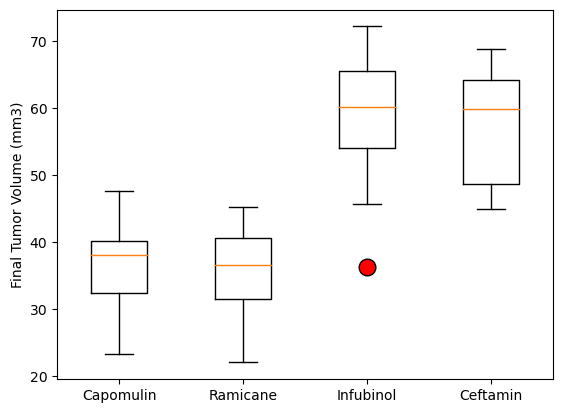

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


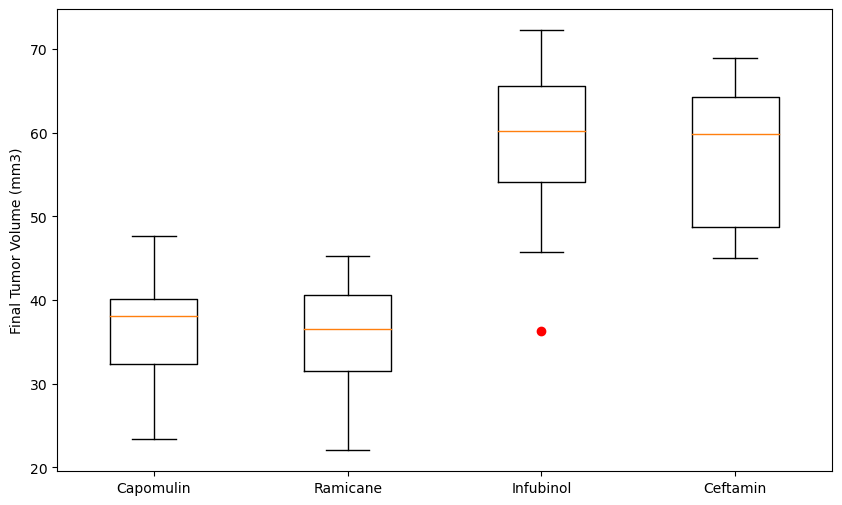

In [49]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, sym='ro')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

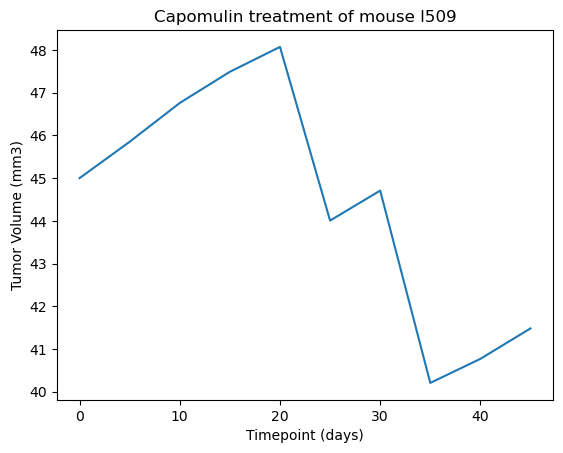

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [54]:
# Check if Mouse ID "I509" exists in the dataset
mouse_id_to_check = "I509"
exists_in_dataset = mouse_id_to_check in cleaned_data["Mouse ID"].values

if exists_in_dataset:
    print(f"The Mouse ID {mouse_id_to_check} exists in the dataset.")
else:
    print(f"The Mouse ID {mouse_id_to_check} does not exist in the dataset.")


The Mouse ID I509 does not exist in the dataset.


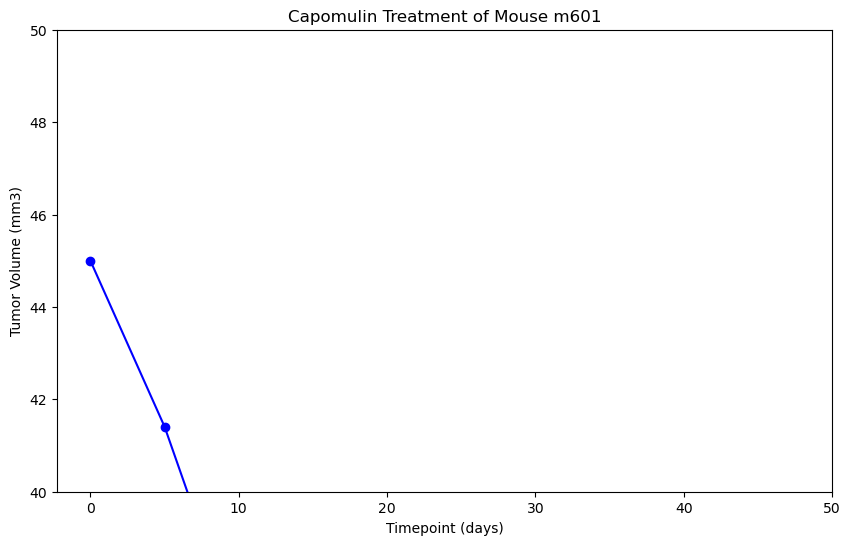

In [56]:
import numpy as np

# Step 1: Choose a specific mouse treated with Capomulin
selected_mouse_id = "m601"

# Step 2: Filter the data for the selected mouse and Capomulin treatment
capomulin_data = cleaned_data[(cleaned_data["Mouse ID"] == selected_mouse_id) & (cleaned_data["Drug Regimen"] == "Capomulin")]

# Step 3: Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
time_points = np.arange(0, 51, 10)  # Create an array for the x-axis with 10-day increments
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='b')
plt.title(f"Capomulin Treatment of Mouse {selected_mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(time_points)  # Set custom x-axis ticks
plt.ylim(40, 50)  # Set the y-axis limits to display tumor volume from 40 to 50

# Show the plot
plt.show()

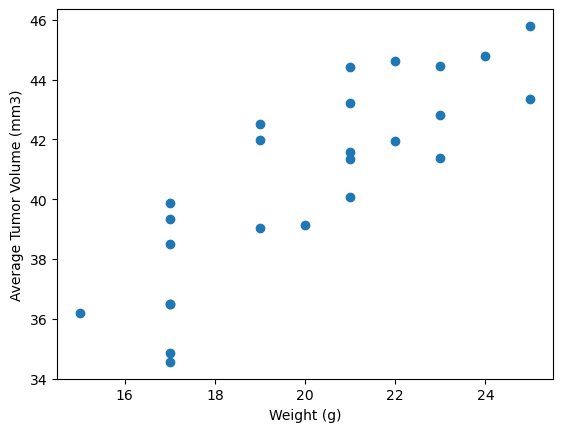

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


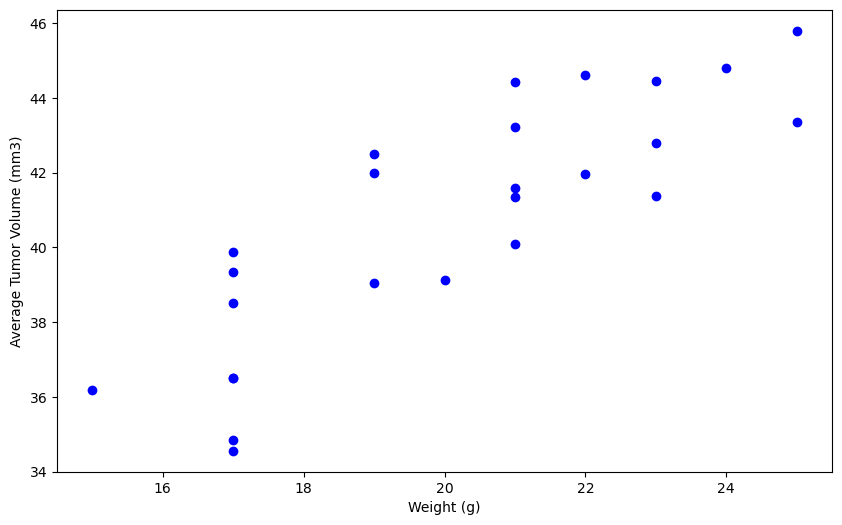

In [59]:
# Step 1: Group the data by "Mouse ID" for the Capomulin regimen
capomulin_grouped = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

# Step 2: Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_volume = capomulin_grouped["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_grouped["Weight (g)"].mean()

# Step 3: Create a scatter plot for mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='b')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


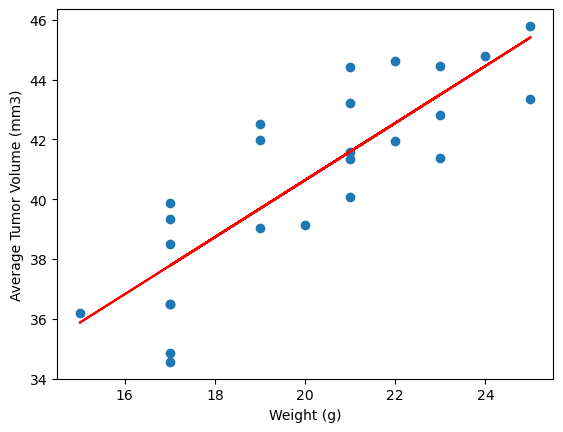

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


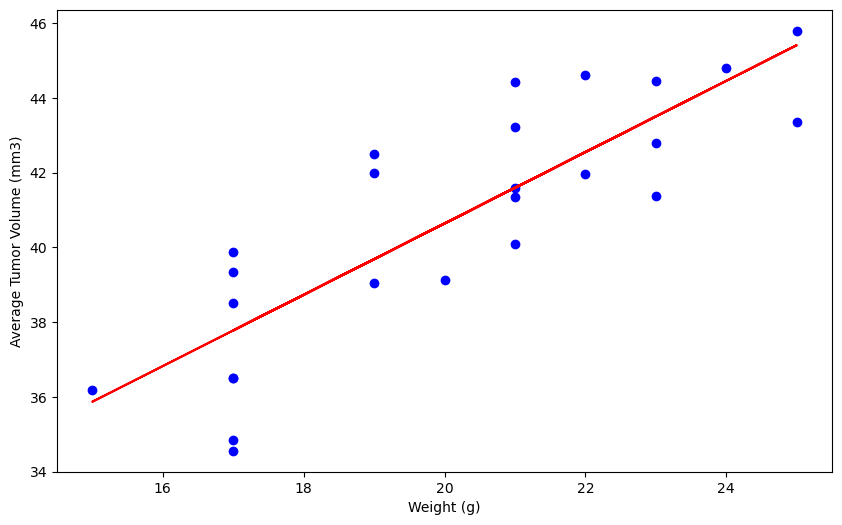

The correlation between mouse weight and the average tumor volume is 0.84


In [63]:
from scipy.stats import linregress

# Group the data by "Mouse ID" for the Capomulin regimen
capomulin_grouped = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_volume = capomulin_grouped["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_grouped["Weight (g)"].mean()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

# Create a scatter plot for mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='b')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the regression values
regress_values = mouse_weight * slope + intercept

# Create the regression line and plot it
plt.plot(mouse_weight, regress_values, "r-")

# Show the plot
plt.show()

# Calculate the correlation and print it
correlation_coefficient = round(r_value, 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")